In [22]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
sigrate, sig = wavfile.read('prelude.wav')
sig = sig[:,0] #taking mono signal of stereo

wavfile.write('prelude_mono.wav', sigrate, sig)

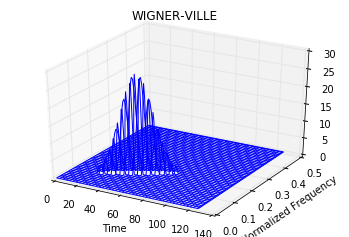

In [60]:
from tftb.processing import WignerVilleDistribution
wvd = WignerVilleDistribution(z)
wvd.run()
wvd.plot(kind='wireframe', extent=[0, 128, 10, 30])


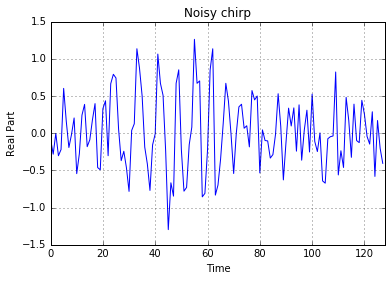

In [28]:
from tftb.generators import sigmerge, noisecg
noisy_signal = sigmerge(z, noisecg(128), 0)
plt.plot(np.real(noisy_signal))
plt.xlim(0, 128)
plt.title('Noisy chirp')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

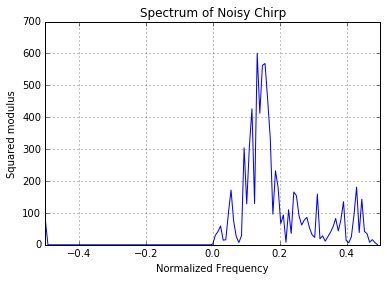

In [29]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(noisy_signal)) ** 2)
plt.plot(np.arange(-64, 64, dtype=float) / 128.0, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum of Noisy Chirp')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

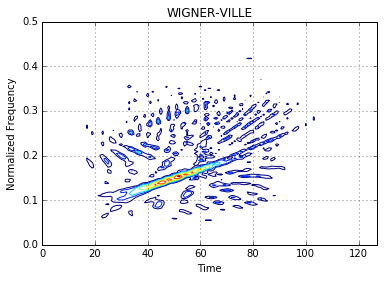

In [31]:
wvd = WignerVilleDistribution(noisy_signal)
wvd.run()
wvd.plot(kind='contour')

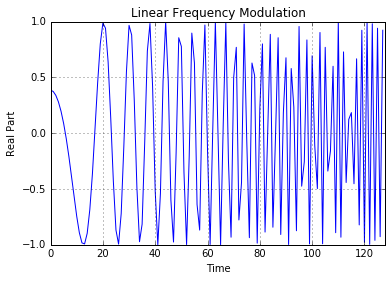

In [35]:

# Generate a chirp signal

n_points = 128
fmin, fmax = 0.0, 0.5

signal, _ = fmlin(n_points, fmin, fmax)
plt.plot(np.real(signal))
plt.xlim(0, n_points)
plt.title('Linear Frequency Modulation')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

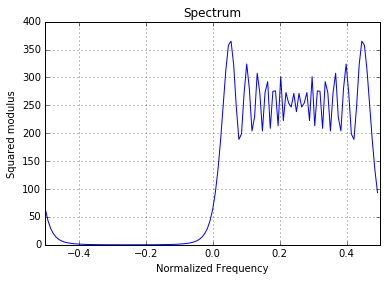

In [36]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)
plt.plot(np.arange(-64, 64, dtype=float) / 128.0, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

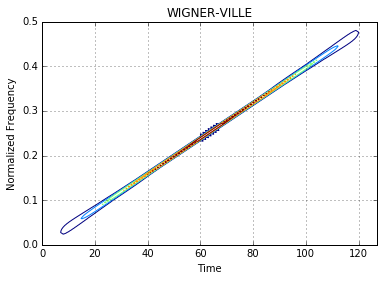

In [37]:
wvd = WignerVilleDistribution(signal)
wvd.run()
wvd.plot(kind='contour', extent=[0, n_points, fmin, fmax])

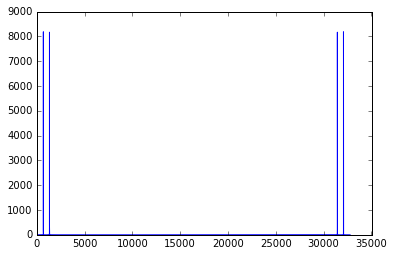

In [53]:
fs = 32768
ts = np.linspace(0, 1, fs)
y1 = np.sin(2 * np.pi * 697 * ts)
y2 = np.sin(2 * np.pi * 1336 * ts)
y = (y1 + y2) / 2

Y = np.fft.fft(y)
freqs = np.arange(fs)
plt.plot(freqs, np.abs(Y))
plt.show()

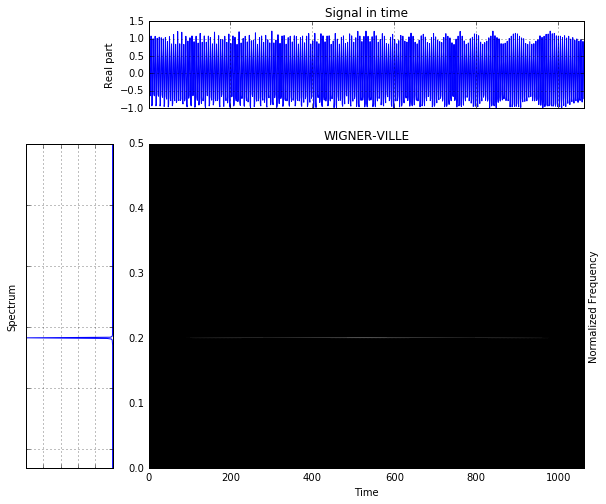

In [51]:

N = 1064
sig = sigmerge(fmlin(N, 0, 0.4)[0], fmlin(N, 0.3, 0.5)[0], 1)
sig = sigmerge(fmlin(N, .1, .2)[0], sig, 10)
sig = sigmerge(fmlin(N, .2, .2)[0], sig, 16)


tfr = WignerVilleDistribution(sig)
tfr.run()
tfr.plot(kind='cmap', sqmod=True, show_tf=True)